In [684]:
"""
TITLE: Exploring Hong Kong's CPI during 2006-2021 
The purpose of this project is to practice data cleaning, organizaion, anlayzing, and visualization with relevant python libraries such as pandas and matplotlib
on the Hong Kong's CPI data from year 2006 to 2021 downloaded from Census and Statstics Department of Hong Kong (https://www.censtatd.gov.hk/en/scode270.html)
"""
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#set the theme for graphs for better visuals
sns.set_theme()

#read the downloaded data previously cleaned manually by cropping relevant numerical data and converting it to csv file  
df = pd.read_csv(r'C:\Users\DYT\Downloads\hkcpi.csv')
df

,Year,All Items (YoY%),Food and non-alcoholic beverages (YoY%),Alcoholic beverages and tobacco (YoY%),Clothing and footwear (YoY%),"Housing, water, electricity, gas and other fuels (YoY%)",Health (YoY%),Transport (YoY%),Communication (YoY%),Recreation and culture (YoY%),Education (YoY%),Restaurants and hotels (YoY%),Insurance and financial services (YoY%),Miscellaneous goods and services (YoY%)
0,2006,2.0,2.5,-3.7,1.0,4.4,0.8,0.8,-6.0,0.0,1.9,1.3,-0.1,3.3
1,2007,2.0,7.1,-1.2,4.1,1.7,1.7,-0.1,-6.8,3.0,-0.1,2.5,0.2,2.3
2,2008,4.3,16.8,0.1,0.8,3.0,3.7,2.6,-5.1,3.2,-4.7,5.8,3.8,4.6
3,2009,0.5,0.9,18.7,2.7,0.9,1.7,-0.8,-5.1,-1.9,-4.3,1.6,3.0,1.7
4,2010,2.4,3.5,3.4,1.7,3.4,2.6,2.0,-3.2,2.4,1.3,1.6,0.4,3.6
5,2011,5.3,9.9,17.1,6.8,6.2,3.5,4.4,-4.3,2.5,2.4,5.2,3.3,4.2
6,2012,4.1,6.5,3.0,3.1,4.5,3.5,3.0,-5.0,2.5,2.7,5.4,1.0,2.4
7,2013,4.3,4.4,1.5,1.7,6.7,3.4,2.4,-3.2,1.9,3.8,4.4,1.7,1.5
8,2014,4.4,3.4,6.5,0.9,7.3,3.2,2.1,-1.7,0.4,4.0,4.6,1.1,2.4
9,2015,3.0,3.4,1.3,-1.7,5.4,3.4,-0.3,-4.7,-3.9,4.0,4.2,1.2,1.7


In [534]:
"""
1. Finding the mean CPI and standard deviation of all items for the period 2006-2021.
"""
#convert yearly CPI to numeric type from string type for calculation
for i in range(len(df)):
     if i!=0: #skip the first row as it is the header
         df.iloc[i,1:] = pd.to_numeric(df.iloc[i,1:])
         df.iloc[i,1:] = df.iloc[i,1:].astype(float)

all_mean= df["All Items (YoY%)"].loc[1:].mean().__round__(1) #mean CPI for all items is 2.7 percent increase per year for 2006-2021
all_sd = df["All Items (YoY%)"].loc[1:].std().__round__(1) #standard deviation is 1.4 percent for all items
max = df["All Items (YoY%)"].iloc[1:].max() #get the max yearly CPI of All items for period between 2006-2021
min = df["All Items (YoY%)"].iloc[1:].min() #get the min yearly CPI of All items for period between 2006-2021   


print(f"From 2006 to 2021, the average inflation rate in Hong Kong for all items was +{all_mean}% every year with standard deviation of {all_sd}% between different items.")
print(f"This means that 65% of inflation rate betwen 2006-2021 was within the range of {round(all_mean-all_sd,1)}% and {all_mean+all_sd}%, and 95% of inflation rate was within the range of {round(all_mean-2*all_sd,1)}% and {all_mean+2*all_sd}%.")

From 2006 to 2021, the average inflation rate in Hong Kong for all items was +2.8% every year with standard deviation of 1.5% between different items.
This means that 65% of inflation rate betwen 2006-2021 was within the range of 1.3% and 4.3%, and 95% of inflation rate was within the range of -0.2% and 5.8%.


In [535]:
"""
2. Finding the highest and lowest CPI changing sector per year for the period between 2006-2021.
"""
#Create a function to check whether there are duplicate values in a list
def get_dupe(list):
    seen = set() #create a set to store seen values
    dupe = []    #create a list to store duplicate values
    for i in list:
        if i in seen:
            dupe.append(i) #append to dupe if value already seen
        else:
            seen.add(i)
    if len(dupe) == 0: #return False if no duplicate values
        return False 
    else:           
        return dupe #else, return overlapping values 
    
#Create a function to get the max, min value with corresponding index of a list
def get_max_min(list):
    max = min = list[0]
    max_index, min_index = 0, 0
    for count, i in enumerate(list):
        if i >= max:
            max = i
            max_index = count
        if i <= min:
            min = i
            min_index = count
    return max, max_index, min, min_index

#Create function to get the year with the max and min value
def get_max_min_year(list):
    max, max_index, min, min_index = get_max_min(list)
    max_year = df['Year'][max_index+1]
    min_year = df['Year'][min_index+1] 
    return max_year, min_year

max_year, min_year = get_max_min_year(df['All Items (YoY%)'][1:].astype(float).tolist())

#IF there are duplicates, further check whether they are the min or max of the list
def dupe_is_max_or_min_check(list):
    if get_dupe(list): #proceed if duplicates are in the list
        dupe = get_dupe(list) #get dupes to compare with max, min of list
        max, x, min, y = get_max_min(list)
        if max in dupe and min in dupe: #return True if max, min value in dupe list False otherwise
            return True 
        else:
            return False

#Confirm that there are no overlapping years with duplicate max or min yearly CPI between 2006-2021 (*compare below: here is checking duplicate CPI rates between yearly average for ALL YEARS between 2006-2021)
if dupe_is_max_or_min_check(df['All Items (YoY%)'][1:].astype(float).tolist()):
    print("There are overlapping years with duplicate yearly CPI that is the max or min value of period 2006-2021.\n")
else:
    print("There are no overlapping years with duplicate yearly CPI that is max or min value of period 2006-2021.\n")


print(f"The highest inflation rate was in {max_year} with {max}%, and the lowest in {min_year} with {min}%.")


There are no overlapping years with duplicate yearly CPI that is max or min value of period 2006-2021.

The highest inflation rate was in 2011 with 5.3%, and the lowest in 2020 with 0.3%.


From the above info, one may assume that the Quantitative Easing by central banks after the 2008 Financial Crisis may have pushed the inflation rate for the following years.

On the other hand, suppressed demands due to lockdowns right after the burst of COVID-19 seems to have led to low inflation rate on 2020.

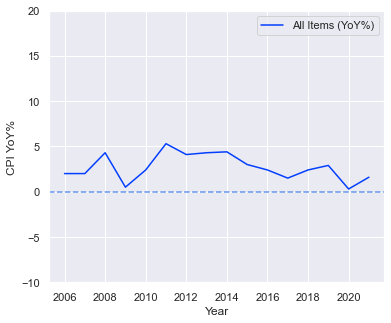

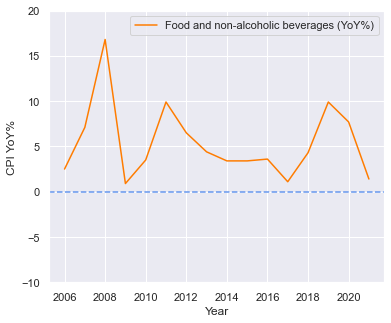

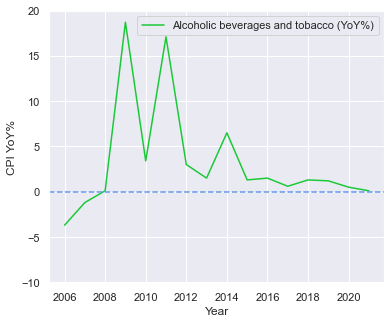

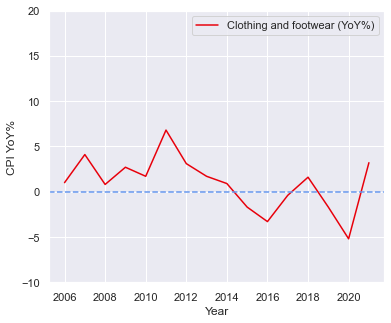

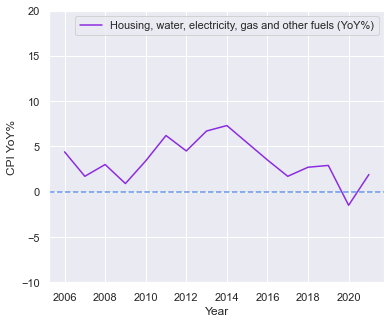

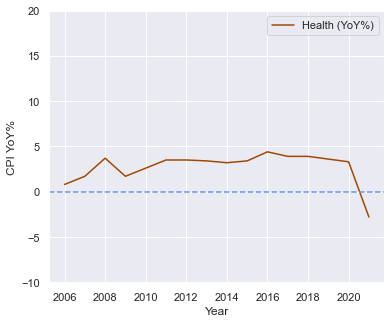

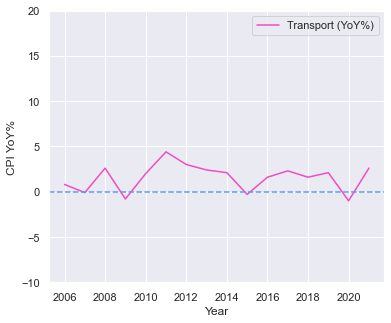

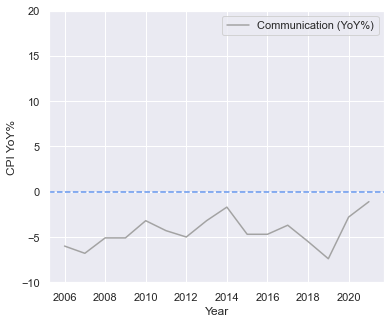

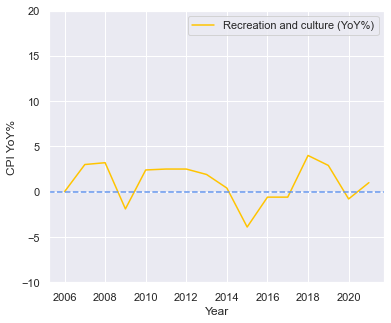

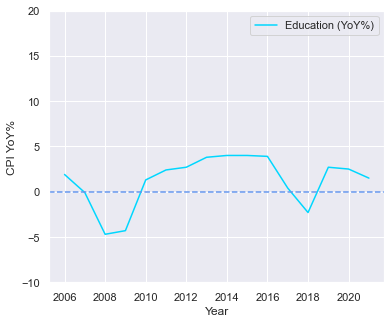

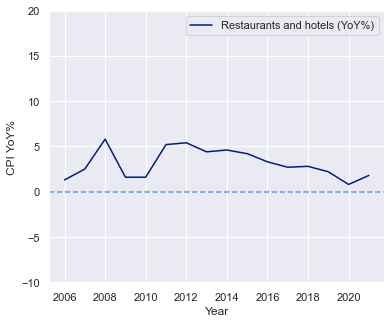

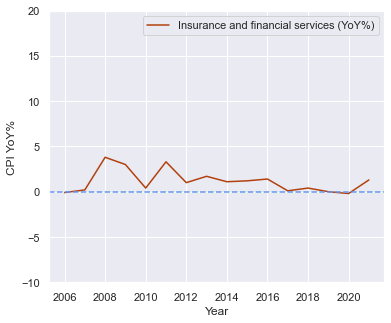

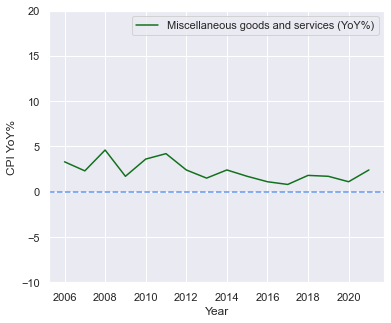

In [536]:
"""
3. Plotting the change in CPI for each items throughout the period 2006-2021
"""
#get the columns only for items (i.e exclude the 'Year' column)
items = df.columns[1:] 

#create list of colors to apply on different items
col =sns.color_palette('bright') + sns.color_palette('dark')

for count, i in enumerate(items):
    graph = df.plot(x='Year', y=i, ylim=[-10,20], ylabel='CPI YoY%', color=col[count], figsize=[6,5]) #plot CPI rate for each item for period 2006-2021
    graph.axhline(0, color='cornflowerblue',linestyle='--') #draw horizontol line at 0% for reference
  


From the above graph from year 2006 to 2021, we can learn the following characteristics for different sectors:

-Average price of "All Items" increased every year;

-Price of "Food and non-alcoholic beverages" increased every year with overall highest consistency and extent;

-Price of "Restaurants and hotels" also increased every year although at lower rate; 

-Price of "Alcoholic beverages and tobacco" leaped between 2008-2012;

-Price of "Health" services and "Housing" increased every year until 2020 after the COVID-19;

-Price of "Clothing and footwear", "Recreation and culture", "Education" fluctuated from increasing and decreasing;

-Price of "Communications" decreased every year;

-However, price of "Transportation" mostly increased every year;

-Price of "Insurance of and financial services" increased every year at relatively small rate.

In [537]:
"""
4. Find the sector with highest and lowest yearly CPI for each year and create a table.
"""
year = df.iloc[1:,0].tolist()

#Confirm that there are no items with duplicate max or min yearly CPI  for any given year between 2006-2021 (*compare above: here is checking duplicate CPI rates between individual items in a SINGLE YEAR)
if dupe_is_max_or_min_check(df.iloc[1,2:].astype(float).tolist()):
    print("There are overlapping max or min yearly CPI between 2006-2021.\n")
else:
    print("There are no overlapping sectors with duplicate max or min yearly CPI for any given year.\n")


#Create function to get the sector with the highest and lowest yearly CPI for each year between 2006-2021
def max_min_item(list):
    max = 0
    min = 0
    max_item = ""
    min_item = ""
    
    for count, i in enumerate(list):
        if i >= max:
            max = i
            max_item = df.columns[count+2] #get the item name from starting from the third column (i.e.where invidiual item name starts)            
        if i <= min:
            min = i
            min_item = df.columns[count+2]
    return max, max_item, min, min_item

#create a dictionary variable to store the max and min CPI YoY% and sector name for each year
Maxs={}
Mins={}
for i in range(len(df)):
    a_year = df.iloc[i,2:].astype(float).tolist()
    max, max_item, min, min_item = max_min_item(a_year)      
    max_item = max_item.replace(' (YoY%)','') #remove '(YoY%)' for clean view
    min_item = min_item.replace(' (YoY%)','')
    #add the each year's max and min items with percentage to respective dictionary 
    Maxs[df['Year'][i]]=[max_item]+[max]
    Mins[df['Year'][i]]=[min_item]+[min]

#convert the max and min dictionary('MnM') into pandas dataframe for processing
Maxs = pd.DataFrame(Maxs).T
Mins = pd.DataFrame(Mins).T

#create a table that shows each MnM of each year 
MnM_table = pd.concat([Maxs,Mins],axis=1)
MnM_table.columns=['Max Item', 'CPI YoY%', 'Min Item', 'CPI YoY%']

#create pandas dataframe for the CPI of average of all tiem for the whole period to use it for reference purpose
Avg = pd.DataFrame(df['All Items (YoY%)'])
index_year = df['Year']
Avg.set_index(index_year, inplace=True)
Avg.index.name=None

#concat the CPI of 'All Items' with the MnM table
MnM_table = pd.concat([MnM_table,Avg], axis=1, sort=True).sort_index()
MnM_table


There are no overlapping sectors with duplicate max or min yearly CPI for any given year.



,Max Item,CPI YoY%,Min Item,CPI YoY%,All Items (YoY%)
2006,"Housing, water, electricity, gas and other fuels",4.4,Communication,-6.0,2.0
2007,Food and non-alcoholic beverages,7.1,Communication,-6.8,2.0
2008,Food and non-alcoholic beverages,16.8,Communication,-5.1,4.3
2009,Alcoholic beverages and tobacco,18.7,Communication,-5.1,0.5
2010,Miscellaneous goods and services,3.6,Communication,-3.2,2.4
2011,Alcoholic beverages and tobacco,17.1,Communication,-4.3,5.3
2012,Food and non-alcoholic beverages,6.5,Communication,-5.0,4.1
2013,"Housing, water, electricity, gas and other fuels",6.7,Communication,-3.2,4.3
2014,"Housing, water, electricity, gas and other fuels",7.3,Communication,-1.7,4.4
2015,"Housing, water, electricity, gas and other fuels",5.4,Communication,-4.7,3.0


'\n@IMPORTANT NOTICE: if running this cell outputs "ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements" PLEASE RERUN the PREVIOUS CELL and then rerun this cell. Thank you.\n'

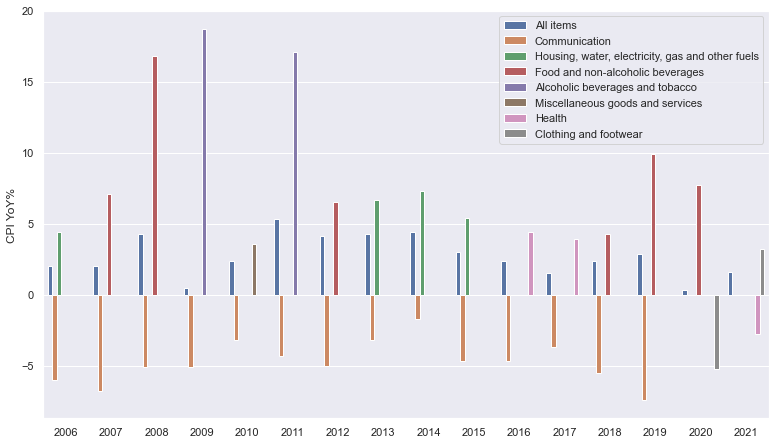

In [538]:
"""
5. Plot the above data by combining the max,min,avg CPI of each year for the whole period.
"""

#add the column with item name for 'All items' for classification when plotting
Avg_item = pd.DataFrame([['All items']*16]).T
index_year = df['Year']
Avg_item.set_index(index_year, inplace=True)
Avg_item.index.name=None
Avg = pd.concat([Avg_item,Avg], axis=1)

#align column names for concatenation
Avg.columns = ['Item', 'CPI YoY%']
Maxs.columns = ['Item', 'CPI YoY%']
Mins.columns = ['Item', 'CPI YoY%']

# #plot a bar graph that shows the MnM CPI YoY% distinguished by different color for each item 
MnM_vertical = pd.concat([Maxs, Mins],axis=0).sort_index()
MnM_vertical = pd.concat([Avg,MnM_vertical], axis=0, sort=True).sort_index()

plt.figure(figsize=(13,7.5))
sns.barplot(data=MnM_vertical, x=MnM_vertical.index, y='CPI YoY%', hue='Item')
# # # sns.set(rc={'figure.figsize':(10,10)})
plt.legend(loc='upper right')

"""
@IMPORTANT NOTICE: if running this cell outputs "ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements" PLEASE RERUN the PREVIOUS CELL and then rerun this cell. Thank you.
"""


,Number of times of Highest yearly CPI during 2006-2021,Number of times of Lowest yearly CPI during 2006-2021
Food and non-alcoholic beverages,6,0
Alcoholic beverages and tobacco,2,0
Miscellaneous goods and services,1,0
"Housing, water, electricity, gas and other fuels",3,0
Health,2,1
Clothing and footwear,1,1
Communication,0,13


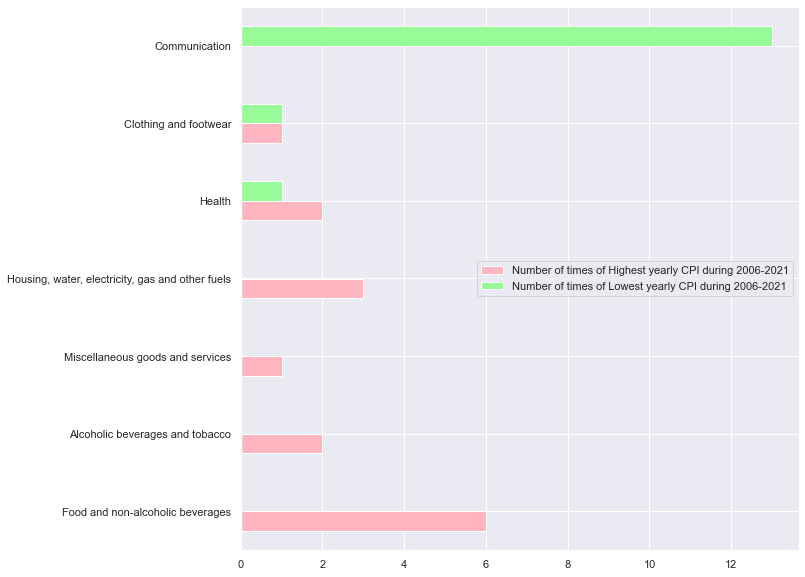

In [689]:
"""
6. Find the sectors with most frequency of highest and lowest yearly CPI% for whole period then create table and graph.
"""
#set variable to store the sector name with highest and lowest yearly CPI for each year.
highest = {}
lowest = {}

#iterater through each year, and check the highest and lowest CPI% of all sectors
for i in range(len(df)):
    if i!= 0:
        a_year = df.iloc[i,2:].astype(float).tolist()
        max, max_item, min, min_item = max_min_item(a_year)        
        if max_item not in highest: #add frequency to the highest CPI% sector if CPI% is max for given year
            highest[max_item] = 1 
        else:
            highest[max_item] += 1
        if min_item not in lowest: #add frequency to the lowest CPI% sector if CPI% is min for given year
            lowest[min_item] = 1
        else:
            lowest[min_item] += 1
#convert the collected list data to pandas dataframe
H = pd.DataFrame(highest, index=['Number of times of Highest yearly CPI during 2006-2021']).T
L = pd.DataFrame(lowest, index=['Number of times of Lowest yearly CPI during 2006-2021']).T
MnM_freq = pd.concat([H,L], axis=1) #concatenate highest and lowest CPI list
MnM_freq = MnM_freq.fillna('0') #convert NaN to 0
MnM_freq = MnM_freq.astype(int) #convert from float to int

#remove the '(YoY%)' part of the item name for clarity
index = list(MnM_freq.index)
for i in range(len(index)):
    index[i] = index[i].replace(' (YoY%)','') 
MnM_freq.index =index
 
MnM_freq.plot.barh(color=['lightpink','palegreen']) 
plt.legend(loc='center right')
MnM_freq

This is the end of this project.


We have looked at:

    -The mean and standard deviation of CPI across All Items of Hong Kong from year 2006 to 2021;

    -Trends of CPI for each sector throughout the whole period;

    -Items that had either highest or lowest yearly CPI, and compared with the average CPI for each year;

    -Number of times each sector had either highest or lowest CPI for each year during the whole period.


Thank you :)